In [1]:
import xarray
import numpy as np
import ttest as tt
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import importlib
importlib.reload(tt)

<module 'ttest' from '/home/nsparks/projects/dasknc/ttest/ttest.py'>

In [44]:
# # upscale era5 test data
# fs=['/net/wrfstore6/disk1/nsparks/data/ttestdemo/era5-u10-2020.nc',
#     '/net/wrfstore6/disk1/nsparks/data/ttestdemo/era5-u10-2021.nc']
# ss=['u10-2020',
#     'u10-2021']

# for f,s in zip(fs,ss):
#     u=xarray.open_dataarray(f,chunks={"time": 10})
#     uc=u.coarsen(longitude=4,boundary='trim').mean().coarsen(latitude=4,boundary='trim').mean()
#     x=np.array(uc).astype('float16')
#     np.save(s,x)

# plt.imshow(np.mean(x1,axis=0),cmap='RdBu', norm=colors.CenteredNorm())
# latx=130
# lonx=0
# x1_1d=x1[:,latx,lonx]
# x2_1d=x2[:,latx,lonx]
# plt.plot(x1_1d)
# plt.plot(x2_1d)
# plt.show()

In [2]:
x1=np.load('u10-2020.npy')
x2=np.load('u10-2021.npy')

In [3]:
pF=tt.ttest(x1,x2,neff=False)
pT=tt.ttest(x1,x2,neff=True)

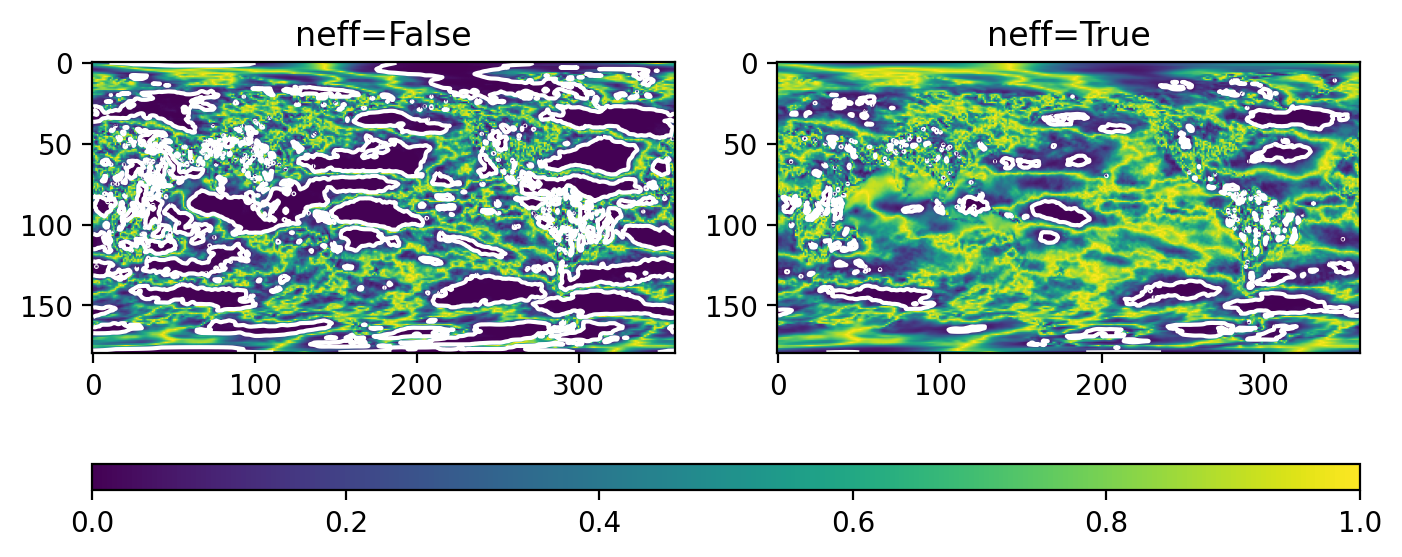

In [4]:
tits=['neff=False','neff=True']
fig,axs=plt.subplots(1,2,figsize=(7,4),dpi=200)
for p,ax,tit in zip((pF,pT),axs.flatten(),tits):
    h=ax.imshow(p,vmin=0,vmax=1)
    ax.contour(p,[0.05],colors='w')
    ax.set_title(tit)
plt.tight_layout()
plt.colorbar(h,ax=axs,location='bottom',aspect=50)